In [16]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import numpy

Training Set Size: 60000
Testing Set Size: 10000


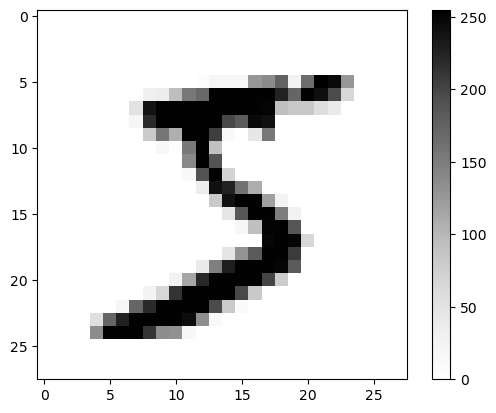

In [97]:
import pickle
import matplotlib.pyplot as plt

f = open("MNIST", "rb")
data = pickle.load(f)
f.close()
print("Training Set Size:", len(data["train"]))
print("Testing Set Size:", len(data["test"]))


plt.imshow(data["train"][0]["image"], cmap="Greys")
plt.colorbar()
plt.show()

In [84]:
type(data["train"][0]["image"])

numpy.ndarray

In [100]:
x_train = []
for i in range(len(data["train"])):
    x_train.append(torch.FloatTensor(data["train"][i]["image"]))

x_train = torch.stack(x_train)

#print(type(x_train))
#print(type(x_train[0]))
#print(x_train.shape)

y_train = []
for j in range(len(data["train"])):
    y_train.append(data["train"][j]["label"])

y_train = torch.Tensor(y_train)

#print(type(y_train))
#print(type(y_train[0]))
#print(y_train.shape)

'''
x_test = []
for i in range(len(data["test"])):
    x_test.append(data["test"][i]["image"])

y_test = []
for i in range(len(data["test"])):
    y_test.append(data["test"][i]["label"])
'''
#y = torch.nn.functional.one_hot(torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), num_classes=10)
#y.shape

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([60000])


'\nx_test = []\nfor i in range(len(data["test"])):\n    x_test.append(data["test"][i]["image"])\n\ny_test = []\nfor i in range(len(data["test"])):\n    y_test.append(data["test"][i]["label"])\n'

In [87]:
x_train[0].shape

torch.Size([28, 28])

In [63]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

class TensorDataset(Dataset):
    def __init__(self, train, train_target, test, test_target, transform=None):
        self.train = train
        self.train_target = train_target
        self.test = test
        self.test_target = test_target
        self.transform = transform
        self.scaler = StandardScaler().fit(train)
    
    def __getitem__(self, index):
        return self.dataset[index], self.labels[index]
    
    def __len__(self):
        return len(self.dataset) 
    
    def output(self, type):
        if type == 1:
            self.dataset, self.labels = self.train, self.train_target
        if type == 2:
            self.dataset, self.labels = self.test, self.test_target
        
        self.dataset = torch.tensor(self.scaler.transform(self.dataset)).float()
        self.labels = torch.tensor(self.labels.to_numpy().reshape(-1)).long()

        return self

'''
dataset = TensorDataset(data["train"][1]["image"], data["train"][1]["label"])
loader = DataLoader(dataset[1], batch_size=28,shuffle=True,num_workers=8,pin_memory=torch.cuda.is_available())


    if i % 100 == 0:
        print("Completed ", i, "datapoints")
'''

'\ndataset = TensorDataset(data["train"][1]["image"], data["train"][1]["label"])\nloader = DataLoader(dataset[1], batch_size=28,shuffle=True,num_workers=8,pin_memory=torch.cuda.is_available())\n\n\n    if i % 100 == 0:\n        print("Completed ", i, "datapoints")\n'

In [64]:
train_images = []
for i in range(len(data["train"])):
    train_images.append(data["train"][i]["image"])

train_labels = []
for j in range(len(data["train"])):
    train_labels.append(data["train"][j]["label"])

test_images = []
for i in range(len(data["test"])):
    test_images.append(data["test"][i]["image"])

test_labels = []
for i in range(len(data["test"])):
    test_labels.append(data["test"][i]["label"])

In [65]:
#transformation = transforms.Compose([transforms.Normalize(0.1307, 0.3081),(0.1307, 0.3081)])

In [66]:
dataset = TensorDataset(train_images, train_labels, test_images, test_labels)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [55]:
loader = DataLoader(dataset, batch_size=60, shuffle=True, num_workers=8)

In [34]:
counter = 0
for epoch in [1,2,3]:
    for batch, label in loader:
        counter +=1
        if counter == 1:
            print(batch, label)
        print(batch.size(), label.size())

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [57]:
dataset[0]
#dataset.target[0]

(tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.],
     

In [24]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1,6,5)
        self.pool = torch.nn.MaxPool2d(2,2)
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        self.fc1 = torch.nn.Linear(16*4*4, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84,10)


    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x